# Notes

# Load Modules

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

import PyComplexHeatmap
from PyComplexHeatmap import *

from pprint import pprint

%matplotlib inline

# Load Data

In [2]:
low_df = pd.read_csv('spatial_all_scores_low.csv', index_col = 0, sep = ' ')
low_df.head()

,LR_comb,lig_cell_type,lig_expr,ligand,rec_cell_type,rec_expr,receptor,LR_expr,lig_nr,rec_nr,rand_expr,av_diff,log2fc,pvalue,LR_cell_comb,p.adj,PI
1,Adam17-Itgb1,GlioB,0.301355,Adam17,NeuB,1.090914,Itgb1,1.392268,7,10,0.427570,0.964699,1.500073,0.024,GlioB--NeuB,0.259000,0.880093
2,Adam17-Itgb1,NeuB,0.000000,Adam17,other,1.246295,Itgb1,1.246295,7,5,0.404461,0.841833,1.416178,0.131,NeuB--other,0.807833,0.131249
3,Adam17-Itgb1,GlioB,0.215253,Adam17,GlioB,0.617245,Itgb1,0.832499,14,14,0.768207,0.064292,0.103063,0.625,GlioB--GlioB,1.000000,0.000000
4,Adam17-Itgb1,GABA,0.000000,Adam17,other,0.725835,Itgb1,0.725835,12,12,0.424986,0.300849,0.653574,0.432,GABA--other,0.882897,0.035352
5,Adam17-Itgb1,RGC,0.000000,Adam17,GlioB,0.684716,Itgb1,0.684716,17,28,0.678512,0.006204,0.011451,0.945,RGC--GlioB,0.971250,0.000145


In [3]:
low_df.shape

(1258, 17)

In [4]:
high_df = pd.read_csv('spatial_all_scores_high.csv', index_col = 0, sep = ' ')
high_df.head()

,LR_comb,lig_cell_type,lig_expr,ligand,rec_cell_type,rec_expr,receptor,LR_expr,lig_nr,rec_nr,rand_expr,av_diff,log2fc,pvalue,LR_cell_comb,p.adj,PI
1,Wnt7b-Fzd10,GlioB,0.000000,Wnt7b,GABA,2.199020,Fzd10,2.199020,3,4,0.089395,2.109625,3.601549,0.001,GlioB--GABA,0.2300,2.298768
2,Pdgfc-Pdgfra,GABA,0.643764,Pdgfc,NeuB,1.365516,Pdgfra,2.009280,5,3,0.084421,1.924859,3.515679,0.000,GABA--NeuB,0.0000,2.243960
3,Bmp7-Acvr2b,NeuB,1.261011,Bmp7,GABA,0.643764,Acvr2b,1.904775,3,5,0.084557,1.820218,3.441299,0.001,NeuB--GABA,0.2300,2.196486
4,Efna3-Epha4,NeuB,0.043588,Efna3,other,0.471866,Epha4,0.515455,63,36,0.096414,0.419041,1.647757,0.002,NeuB--other,0.0575,2.043766
5,Efnb3-Ephb3,GABA,1.035739,Efnb3,GlioB,0.933320,Ephb3,1.969060,4,3,0.140780,1.828280,3.103189,0.001,GABA--GlioB,0.2300,1.980679


In [5]:
high_df.shape

(10810, 17)

In [6]:
merged_df = pd.merge(left = low_df[['LR_comb', 'LR_cell_comb', 'log2fc', 'pvalue']], right = high_df[['LR_comb', 'LR_cell_comb', 'log2fc', 'pvalue']], on = ['LR_comb', 'LR_cell_comb'])
merged_df

,LR_comb,LR_cell_comb,log2fc_x,pvalue_x,log2fc_y,pvalue_y
0,Adam17-Itgb1,GlioB--NeuB,1.500073,0.024,-0.038270,0.900
1,Adam17-Itgb1,NeuB--other,1.416178,0.131,-0.413335,0.522
2,Adam17-Itgb1,GlioB--GlioB,0.103063,0.625,0.067777,0.692
3,Adam17-Itgb1,GABA--other,0.653574,0.432,0.025599,0.860
4,Adam17-Itgb1,RGC--GlioB,0.011451,0.945,0.044071,0.873
...,...,...,...,...,...,...
1253,Vcam1-Itgb1,GluNeuB--GluNeu,-0.741600,0.866,0.099169,0.508
1254,Vcam1-Itgb1,GABA--RGC,-1.156684,0.485,-1.786979,0.762
1255,Vcam1-Itgb1,RGC--GABA,-1.072371,0.556,-1.897248,0.736
1256,Vcam1-Itgb1,GluNeu--RGC,-1.116658,0.897,-1.643998,0.836


In [7]:
merged_df_l = merged_df[['LR_comb', 'LR_cell_comb', 'log2fc_x', 'pvalue_x']]
merged_df_l.columns = ['LR_comb', 'LR_cell_comb', 'log2fc', 'pvalue']
merged_df_h = merged_df[['LR_comb', 'LR_cell_comb', 'log2fc_y', 'pvalue_y']]
merged_df_h.columns = ['LR_comb', 'LR_cell_comb', 'log2fc', 'pvalue']

final_df = pd.concat((merged_df_l, merged_df_h))
final_df['NTScore'] = ['low'] * merged_df_l.shape[0] + ['high'] * merged_df_l.shape[0]
final_df

,LR_comb,LR_cell_comb,log2fc,pvalue,NTScore
0,Adam17-Itgb1,GlioB--NeuB,1.500073,0.024,low
1,Adam17-Itgb1,NeuB--other,1.416178,0.131,low
2,Adam17-Itgb1,GlioB--GlioB,0.103063,0.625,low
3,Adam17-Itgb1,GABA--other,0.653574,0.432,low
4,Adam17-Itgb1,RGC--GlioB,0.011451,0.945,low
...,...,...,...,...,...
1253,Vcam1-Itgb1,GluNeuB--GluNeu,0.099169,0.508,high
1254,Vcam1-Itgb1,GABA--RGC,-1.786979,0.762,high
1255,Vcam1-Itgb1,RGC--GABA,-1.897248,0.736,high
1256,Vcam1-Itgb1,GluNeu--RGC,-1.643998,0.836,high


In [10]:
final_df['LR_comb'] = [x.upper() for x in final_df['LR_comb']]
final_df.head()

,LR_comb,LR_cell_comb,log2fc,pvalue,NTScore
0,ADAM17-ITGB1,GlioB--NeuB,1.500073,0.024,low
1,ADAM17-ITGB1,NeuB--other,1.416178,0.131,low
2,ADAM17-ITGB1,GlioB--GlioB,0.103063,0.625,low
3,ADAM17-ITGB1,GABA--other,0.653574,0.432,low
4,ADAM17-ITGB1,RGC--GlioB,0.011451,0.945,low


In [11]:
from more_itertools import flatten

cc_order = ["RGC--GlioB", "GlioB--RGC", 
            "RGC--NeuB", "NeuB--RGC", 
            "RGC--GluNeuB", "GluNeuB--RGC", ]
x_order = list(flatten([[f'{x} low', f'{x} high'] for x in cc_order]))


In [12]:
final_df['new_CC'] = final_df['LR_cell_comb'] + ' ' + final_df['NTScore']

In [13]:
final_df['-log10 pvalue'] = -np.log10(final_df['pvalue'])

/sc/arion/work/wangw32/conda-env/envs/gpu_test/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [14]:
final_df['new_CC'] = pd.Categorical(final_df['new_CC'], x_order)

In [15]:
final_df['LR_comb'] = pd.Categorical(final_df['LR_comb'], sorted(final_df['LR_comb'].unique(), key = lambda x: (x.split('-')[1])))

In [16]:
final_df_1 = final_df[[True if x in x_order else False for x in final_df['new_CC']]].sort_values(by = ['new_CC'])

In [17]:
final_df_2 = final_df_1.sort_values(by = ['new_CC', 'LR_comb'])

In [18]:
final_df_2

,LR_comb,LR_cell_comb,log2fc,pvalue,NTScore,new_CC,-log10 pvalue
117,COL1A1-DDR1,RGC--GlioB,-0.751923,0.128,low,RGC--GlioB low,0.892790
277,EFNA5-EPHB2,RGC--GlioB,0.143029,0.642,low,RGC--GlioB low,0.192465
312,EFNB1-EPHB2,RGC--GlioB,0.219266,0.447,low,RGC--GlioB low,0.349692
786,NRG1-ERBB4,RGC--GlioB,-0.130291,0.644,low,RGC--GlioB low,0.191114
819,NRG3-ERBB4,RGC--GlioB,0.000050,0.893,low,RGC--GlioB low,0.049149
...,...,...,...,...,...,...,...
1174,SLIT2-ROBO2,GluNeuB--RGC,-0.370043,0.470,high,GluNeuB--RGC high,0.327902
667,LAMB2-RPSA,GluNeuB--RGC,0.090109,0.414,high,GluNeuB--RGC high,0.383000
1198,SLIT2-SDC1,GluNeuB--RGC,-0.545686,0.344,high,GluNeuB--RGC high,0.463442
1059,RTN4-TNFRSF19,GluNeuB--RGC,-0.397646,0.370,high,GluNeuB--RGC high,0.431798


In [19]:
final_df_2.to_csv("L_R_summary.csv", index=False)

In [20]:
df_row = pd.DataFrame({'LR_cell_comb': list(flatten([[x, x] for x in cc_order])), 'NTScore': list(flatten([[f'low', f'high'] for x in cc_order]))}, index=x_order)
df_row.index.name = 'new_CC'

row_ha = HeatmapAnnotation(
    CCI=anno_simple(df_row.LR_cell_comb, cmap='Set1',legend=True,add_text=False),
    NT_score=anno_simple(df_row.NTScore,cmap='Dark2',legend=True,add_text=False),
    axis=0,verbose=0,label_kws={'rotation':45,'horizontalalignment':'left'}
)

# row_ha = HeatmapAnnotation(
#                            Category=anno_simple(df_row.Category,cmap='Set1',
#                                            add_text=False,legend=False),
#                            label=anno_label(df_row.Category, merge=True,rotation=0),
#                            axis=0,verbose=0,label_kws={'rotation':45,'horizontalalignment':'left'})

# col_ha = HeatmapAnnotation(
#                            Dataset=anno_simple(df_col.Dataset,cmap='Set1',legend=False,add_text=True),
#                            Correlation=anno_simple(df_col.Correlation,cmap='Dark2',legend=False,add_text=True),
#                            verbose=0,label_side='left',label_kws={'horizontalalignment':'right'})

In [21]:
df_row

,LR_cell_comb,NTScore
new_CC,,
RGC--GlioB low,RGC--GlioB,low
RGC--GlioB high,RGC--GlioB,high
GlioB--RGC low,GlioB--RGC,low
GlioB--RGC high,GlioB--RGC,high
RGC--NeuB low,RGC--NeuB,low
RGC--NeuB high,RGC--NeuB,high
NeuB--RGC low,NeuB--RGC,low
NeuB--RGC high,NeuB--RGC,high
RGC--GluNeuB low,RGC--GluNeuB,low


/sc/arion/work/wangw32/conda-env/envs/gpu_test/lib/python3.11/site-packages/PyComplexHeatmap/dotHeatmap.py:352: FutureWarning: The provided callable <function mean at 0x2b212e6f9440> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  data2d = data.pivot_table(
/sc/arion/work/wangw32/conda-env/envs/gpu_test/lib/python3.11/site-packages/PyComplexHeatmap/dotHeatmap.py:367: FutureWarning: The provided callable <function mean at 0x2b212e6f9440> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  self.kwargs["s"] = data.pivot_table(
/sc/arion/work/wangw32/conda-env/envs/gpu_test/lib/python3.11/site-packages/PyComplexHeatmap/dotHeatmap.py:388: FutureWarning: The provided callable <function mean at 0x2b212e6f9440> is currently using DataFrameGroup

Starting plotting..
Starting calculating row orders..
Reordering rows..
Starting calculating col orders..
Reordering cols..
Plotting matrix..
Plotting legends..
Estimated legend width: 32.80972222222222 mm


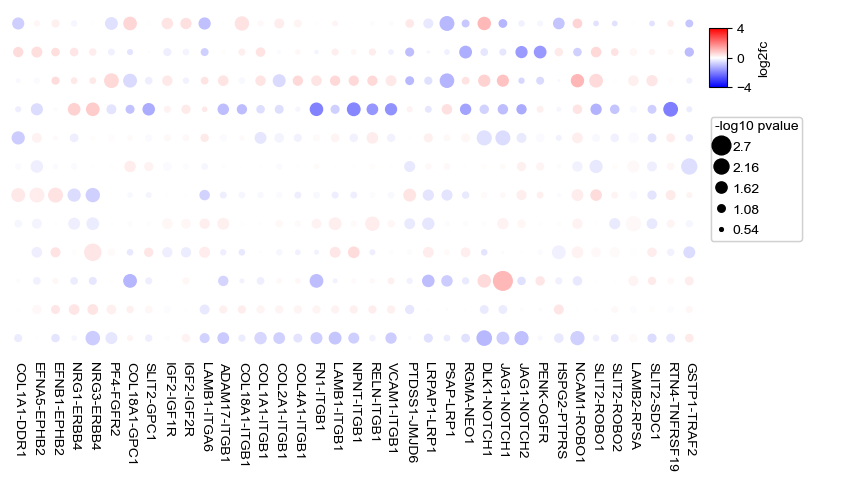

In [22]:


fig, ax = plt.subplots(figsize=(9,4))
cm = DotClustermapPlotter(data=final_df_2,
                          x='LR_comb',
                          y='new_CC',
                          value='log2fc',
                          vmin=-4,
                          vmax=4,
                          c='log2fc',
                          cmap='bwr',
                          cmap_legend_kws = {'vmin': 0, 'vmax': 2.5},
                          s='-log10 pvalue',
                          col_cluster=False,
                          row_cluster=False,
                          # right_annotation=row_ha,
                          # row_split=df_row.LR_cell_comb,
                          show_rownames=False,
                          show_colnames=True,)
fig.savefig('CCC_compare.pdf', transparent=True)

In [23]:
final_df_2[final_df_2['-log10 pvalue'] == 1]

,LR_comb,LR_cell_comb,log2fc,pvalue,NTScore,new_CC,-log10 pvalue
867,PENK-OGFR,RGC--GlioB,-1.614998,0.1,high,RGC--GlioB high,1.0
836,NRG3-ERBB4,NeuB--RGC,-0.293427,0.1,high,NeuB--RGC high,1.0


In [24]:
final_df_2[final_df_2['-log10 pvalue'] == 2]

,LR_comb,LR_cell_comb,log2fc,pvalue,NTScore,new_CC,-log10 pvalue
820,NRG3-ERBB4,RGC--GluNeuB,0.388692,0.01,low,RGC--GluNeuB low,2.0


In [25]:
final_df_2.head()

,LR_comb,LR_cell_comb,log2fc,pvalue,NTScore,new_CC,-log10 pvalue
117,COL1A1-DDR1,RGC--GlioB,-0.751923,0.128,low,RGC--GlioB low,0.892790
277,EFNA5-EPHB2,RGC--GlioB,0.143029,0.642,low,RGC--GlioB low,0.192465
312,EFNB1-EPHB2,RGC--GlioB,0.219266,0.447,low,RGC--GlioB low,0.349692
786,NRG1-ERBB4,RGC--GlioB,-0.130291,0.644,low,RGC--GlioB low,0.191114
819,NRG3-ERBB4,RGC--GlioB,0.000050,0.893,low,RGC--GlioB low,0.049149


In [26]:
print(final_df_2['-log10 pvalue'].min())
print(final_df_2['-log10 pvalue'].max())

-0.0
2.6989700043360187


In [27]:
print(final_df_2['log2fc'].min())
print(final_df_2['log2fc'].max())

-2.02033991589575
1.15268349365761


Estimated legend width: 14.006666666666668 mm


/tmp/ipykernel_118318/4194694572.py:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')


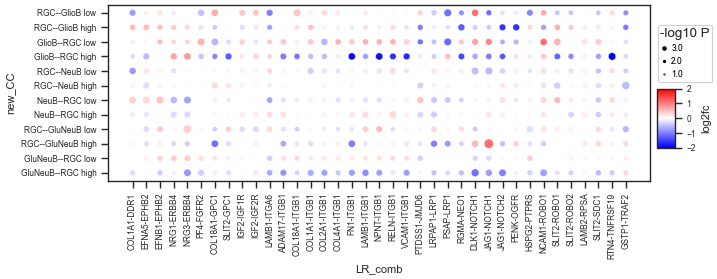

In [28]:
with sns.axes_style('white', rc={
        'xtick.bottom': True,
        'ytick.left': True
}), sns.plotting_context('paper',
                         rc={
                             'axes.titlesize': 8,
                             'axes.labelsize': 8,
                             'xtick.labelsize': 6,
                             'ytick.labelsize': 6,
                             'legend.fontsize': 6
                         }):
    fig, ax = plt.subplots(figsize=(7,2))
    sns.scatterplot(data = final_df_2, x = 'LR_comb', y = 'new_CC', hue = 'log2fc', hue_norm = (-2,2), size='-log10 pvalue', palette = 'bwr', legend=False, ax=ax)
    
    # ----- legend -----
    legend_list = []
    # --- size ---
    # ax
    # title
    # sizes
    size_title = '-log10 P'
    sizes = final_df_2['-log10 pvalue']
    
    w, h = (
        ax.get_window_extent().width / ax.figure.dpi,
        ax.get_window_extent().height / ax.figure.dpi,
    )
    r = min(w * 72 / 50, h * 72 / 50)
    ratio = r ** 2
    
    # s=self.kwargs.get('s',None)
    # colors=self.kwargs.get('colors',None)
    markers1 = {}
    ms = {}
    for f in [1, 0.8, 0.6, 0.4, 0.2]:
        k = str(round(f * sizes.max(), 0))
        markers1[k] = "o"
        ms[k] = f  * np.sqrt(ratio) * 1
    title = size_title
    legend_list.append(
        [
            (markers1, None, ms),
            title,
            {},
            len(markers1),
            "markers",
        ]
    )
    # --- color map ---
    import matplotlib.colors as mcolors
    # cmap
    # c_values
    # vmin
    # vmax
    # c_title
    cmap = "bwr"
    c_values = final_df_2['log2fc']
    c_title = 'log2fc'
    vmin = -2
    vmax = 2
    
    original_cmap = plt.colormaps[cmap]
    
    start = (vmin - c_values.min()) / (c_values.max() - c_values.min())
    end = (vmax - c_values.min()) / (c_values.max() - c_values.min())
    cmap_legend_kws = {}
    cmap_legend_kws.setdefault("vmin", vmin)
    cmap_legend_kws.setdefault("vmax", vmax)
    cmap_legend_kws.setdefault("ticks", [-2, -1, 0, 1, 2])
    # cmap_legend_kws.setdefault("extend", "both")
    new_cmap = mcolors.LinearSegmentedColormap.from_list(
    'truncated_cmap', 
    original_cmap(np.linspace(start, end, 256))
)
    legend_list.append([cmap, c_title, cmap_legend_kws, 9, "cmap"])
    
    # --- add legend ---
    plot_legend_list(legend_list=legend_list, ax=ax)
    
    # output
    ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')
    fig.savefig('CCC_compare_2.pdf', transparent=True)